In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gudhi as gd
from gudhi.representations import PersistenceImage, BettiCurve, Entropy

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde

from pathlib import Path
from tqdm.notebook import tqdm

In [2]:
data_input = Path('data_segmented')
input_airyscan = data_input / 'Airyscan'
input_sted = data_input / 'STED'

data_pers = Path('data_processed')
pers_sted = data_pers / 'persistence_sted'
pers_airyscan = data_pers / 'persistence_airyscan'
vectorization_sted = data_pers / 'vectorizations_sted'
vectorization_airyscan = data_pers / 'vectorizations_airyscan'
classification_path = data_pers / 'classification'

figures_path = Path('figures_plots')

In [26]:
preproc_choice = 'clip_minmax_gaussian2c_minmax'

class_files = sorted([file for file in classification_path.rglob('*classification*traintest_runs*.csv')
                      if preproc_choice in file.name and 'sted' in file.name.lower()
                      and 'new' in file.name.lower()])
df_class_sted = pd.concat([pd.read_csv(file) for file in tqdm(class_files)])
df_class_sted = df_class_sted.sort_values(by=['dim', 'type', 'run'])

class_files = sorted([file for file in classification_path.rglob('*classification*traintest_runs*.csv')
                      if preproc_choice in file.name and 'airyscan' in file.name.lower()
                      and 'new' in file.name.lower()])
df_class_airy = pd.concat([pd.read_csv(file) for file in tqdm(class_files)])
df_class_airy = df_class_airy.sort_values(by=['dim', 'type', 'run'])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_class_sted.drop(columns=['hash_train', 'hash_test', 'prefix']).groupby(['dim', 'type'])\
    .agg(['mean', 'std']).reset_index()

dim  type accuracy_balanced           accuracy_train           precision  \
                          mean       std           mean       std      mean   
0    2   all          0.978926  0.013564       0.998810  0.003174  0.981902   
1    2    bc          0.981518  0.010624       0.998810  0.001997  0.982460   
2    2   ecc          0.929422  0.022356       0.984354  0.019222  0.936506   
3    2   ent          0.971047  0.016022       0.999320  0.001779  0.976010   
4    2    pi          0.962123  0.015862       0.999830  0.000761  0.968061   
5    2  stat          0.970379  0.019998       0.996429  0.005991  0.973168   
6    3   all          0.977710  0.013860       0.997959  0.004040  0.980795   
7    3    bc          0.971007  0.014171       0.999490  0.001664  0.974224   
8    3   ecc          0.954621  0.014428       0.992007  0.010940  0.961454   
9    3   ent          0.973222  0.013576       0.997279  0.009846  0.976037   
10   3    pi          0.949570  0.018817       0.975170  0.015335  0.957763   
11   3  stat          0.977433  0.013648       0.988776  0.007245  0.977814   

                recall            run           
         std      mean       std mean      std  
0   0.009389  0.981522  0.009561  9.5  5.91608  
1   0.009295  0.982065  0.009512  9.5  5.91608  
2   0.018460  0.935598  0.018600  9.5  5.91608  
3   0.012850  0.975543  0.013254  9.5  5.91608  
4   0.013238  0.967391  0.013658  9.5  5.91608  
5   0.016726  0.972554  0.017048  9.5  5.91608  
6   0.011627  0.980435  0.012011  9.5  5.91608  
7   0.012529  0.973913  0.012788  9.5  5.91608  
8   0.011476  0.960598  0.011680  9.5  5.91608  
9   0.013018  0.975272  0.013825  9.5  5.91608  
10  0.015297  0.956793  0.015114  9.5  5.91608  
11  0.012610  0.977174  0.013382  9.5  5.91608

In [27]:
df_class_airy.drop(columns=['hash_train', 'hash_test', 'prefix']).groupby(['dim', 'type'])\
    .agg(['mean', 'std']).reset_index()

dim  type accuracy_balanced           accuracy_train           precision  \
                          mean       std           mean       std      mean   
0    2   all          0.753731  0.086168       0.991964  0.025930  0.785724   
1    2    bc          0.744583  0.083364       0.977321  0.050562  0.778112   
2    2   ecc          0.664754  0.074495       0.966429  0.073617  0.713089   
3    2   ent          0.742860  0.083373       0.972321  0.053262  0.779665   
4    2    pi          0.719867  0.077431       0.985179  0.041165  0.759396   
5    2  stat          0.721780  0.061426       0.989464  0.027582  0.760999   
6    3   all          0.900114  0.058462       0.999286  0.003517  0.910208   
7    3    bc          0.869564  0.079342       0.990179  0.017835  0.886982   
8    3   ecc          0.810322  0.068614       0.970536  0.044426  0.833333   
9    3   ent          0.850777  0.061832       0.989107  0.026118  0.868721   
10   3    pi          0.826780  0.084536       0.999286  0.004337  0.847766   
11   3  stat          0.911951  0.051136       0.996429  0.007614  0.919079   

                recall             run             
         std      mean       std  mean        std  
0   0.072860  0.749714  0.073785  49.5  29.011492  
1   0.070524  0.746286  0.073129  49.5  29.011492  
2   0.063856  0.678000  0.072173  49.5  29.011492  
3   0.067215  0.757429  0.072246  49.5  29.011492  
4   0.066222  0.704286  0.069675  49.5  29.011492  
5   0.052687  0.721429  0.070733  49.5  29.011492  
6   0.048199  0.899143  0.054552  49.5  29.011492  
7   0.065561  0.871429  0.079215  49.5  29.011492  
8   0.055991  0.805714  0.068557  49.5  29.011492  
9   0.051640  0.846000  0.065215  49.5  29.011492  
10  0.069802  0.828286  0.077849  49.5  29.011492  
11  0.042960  0.908286  0.047757  49.5  29.011492

# Different persistence thresholds

In [ ]:
name = 'thresh-birth-000-pers-000_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax'

idx = name.index('birth')

birth_value = name[name.index('birth') + len('birth-'):].split('-')[0]
print(birth_value)

000


In [35]:
class_files

[PosixPath('data_processed/classification/thresh-birth-000-pers-000_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv'),
 PosixPath('data_processed/classification/thresh-birth-000-pers-005_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv'),
 PosixPath('data_processed/classification/thresh-birth-000-pers-010_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv'),
 PosixPath('data_processed/classification/thresh-birth-000-pers-015_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv'),
 PosixPath('data_processed/classification/thresh-birth-000-pers-020_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv'),
 PosixPath('data_processed/classification/thresh-birth-005-pers-000_classification_airyscan_traintest_runs-10_perc-70_airyscan_clip_minmax_gaussian2c_minmax.csv'),
 PosixPath('data

In [52]:
class_files = sorted([file for file in classification_path.rglob('*classification*traintest_runs*.csv')
                      if preproc_choice in file.name
                       and 'airyscan' in file.name.lower()
                       and 'thresh' in file.name.lower()])
df_class_airy = []
for cli, classfilename in enumerate(class_files):
    name = classfilename.name
    df_tmp = pd.read_csv(classfilename)
    df_tmp.loc[:, 'max_birth'] = -np.float32(name[name.index('birth') + len('birth-'):].split('-')[0])/100
    df_tmp.loc[:, 'min_pers'] = np.float32(name[name.index('pers') + len('pers-'):].split('_')[0])/100
    df_class_airy.append(df_tmp.copy())

df_class_airy = pd.concat(df_class_airy)
df_class_airy = df_class_airy.sort_values(by=['dim', 'type', 'run'])

In [53]:
df_plot = df_class_airy.\
    drop(columns=['hash_train', 'hash_test', 'prefix']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).\
    agg(['mean', 'std']).\
    reset_index()

In [54]:
df_plot = df_class_airy.melt(id_vars=['dim', 'type', 'max_birth', 'min_pers'],
                   value_vars=['accuracy_balanced'])

In [74]:
df_plot

,dim,type,max_birth,min_pers,accuracy_balanced,accuracy_train,precision,recall,run
0,2,all,-0.3,0.00,0.796212,0.985714,0.821024,0.791429,4.5
1,2,all,-0.3,0.05,0.795644,0.992857,0.821042,0.777143,4.5
2,2,all,-0.3,0.10,0.764015,0.958929,0.798878,0.737143,4.5
3,2,all,-0.3,0.15,0.769886,0.967857,0.802394,0.748571,4.5
4,2,all,-0.3,0.20,0.700379,0.926786,0.745483,0.697143,4.5
...,...,...,...,...,...,...,...,...,...
415,3,stat,-0.0,0.00,0.931439,1.000000,0.934141,0.922857,4.5
416,3,stat,-0.0,0.05,0.790341,0.985714,0.821928,0.780000,4.5
417,3,stat,-0.0,0.10,0.741288,0.964286,0.784147,0.722857,4.5
418,3,stat,-0.0,0.15,0.756818,0.950000,0.792546,0.754286,4.5


In [ ]:
le_type = LabelEncoder()
unq_vals = np.unique(np.stack([df_plot_grouped['dim'].values,
    le_type.fit_transform(df_plot_grouped['type'].values)]).T,
    axis=0)
unq_vals = unq_vals.astype(str)
unq_vals[:,1] = le_type.inverse_transform(unq_vals[:,1].astype(int))

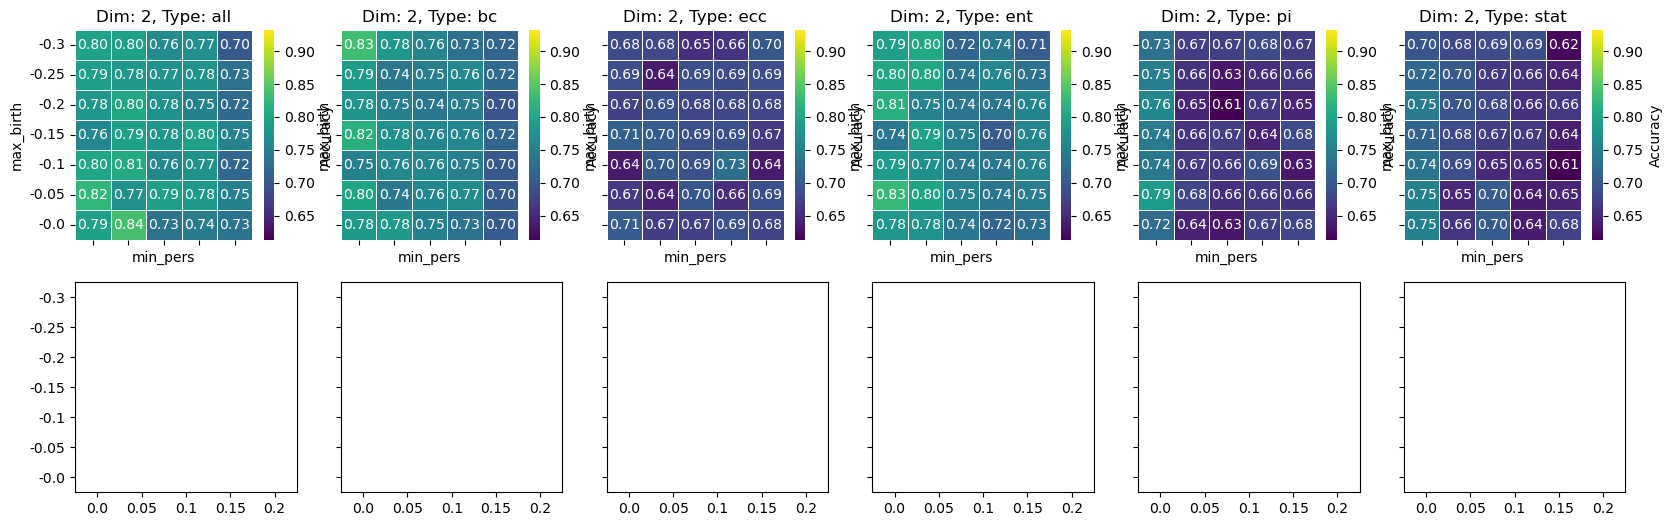

In [ ]:


df_plot_grouped = df_class_airy.\
    drop(columns=['hash_train', 'hash_test', 'prefix']).\
    groupby(['dim', 'type', 'max_birth', 'min_pers']).mean().reset_index()
types = df_plot_grouped['type'].unique()
vmin = df_plot_grouped['accuracy_balanced'].min()
vmax = df_plot_grouped['accuracy_balanced'].max()


# Now plot the heatmaps
fig, ax = plt.subplots(2, len(types), figsize=(20, 6), sharex=True, sharey=True)

for dimi, dim in enumerate(range(2, 3)):
    for typei, type in enumerate(types):
        axi = (dimi, typei)

        # Plot the heatmap for each dimension and type
        df_plot = df_plot_grouped.loc[(df_plot_grouped['dim'] == dim) & (df_plot_grouped['type'] == type)].\
            pivot(index='max_birth', columns='min_pers', values='accuracy_balanced')

        sns.heatmap(df_plot, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Accuracy'}, linewidths=0.5,
                    vmin=vmin, vmax=vmax, ax=ax[axi], cbar=False)

        ax[axi].set_title(f'Dim: {dim}, Type: {type}')

Text(0.5, 1.0, '3D - Airyscan')

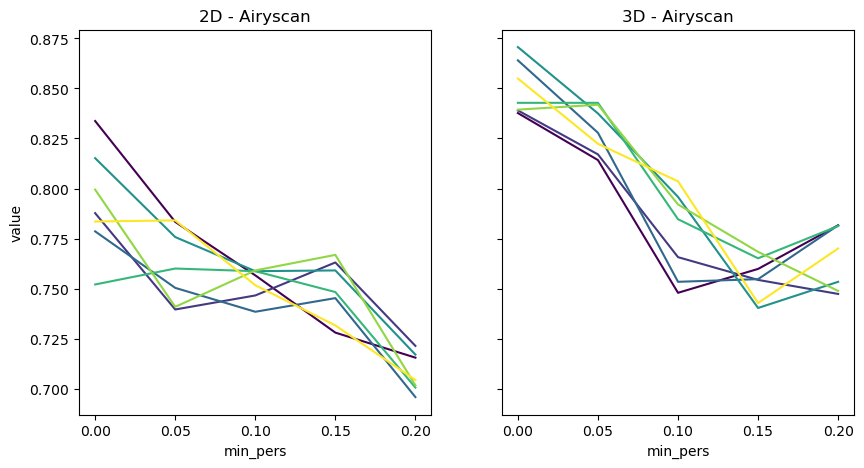

In [66]:
fig, ax = plt.subplots(1,2, figsize=(10, 5), sharey=True)

sns.lineplot(data=df_plot.loc[(df_plot['dim'] == 2) & (df_plot['type']=='bc')],
             x='min_pers', y='value', hue='max_birth', style='type',
             ax=ax[0], err_style=None, palette='viridis', legend=None)
sns.lineplot(data=df_plot.loc[(df_plot['dim'] == 3) & (df_plot['type']=='bc')],
             x='min_pers', y='value', hue='max_birth', style='type',
             ax=ax[1], err_style=None, palette='viridis', legend=None)

ax[0].set_title('2D - Airyscan')
ax[1].set_title('3D - Airyscan')